<h1 style="text-align: center;">Trabalho Computacional - Otimização - 2022.2</p>

**Universidade Federal do Rio de Janeiro - PESC**  
**Professores:** Laura Bahiense e Luidi Simonetti  
**Alunos:** Leonardo Nunes Guimarães Costa e Victor Ribeiro 

## 1 - Objetivo e Especificações


Minimizar computacionalmente a seguinte função:

\begin{equation*}
    f(x_1, x_2) = \sqrt{ln^2(x_1)+ln^2(x_2)} \qquad 
\end{equation*}

### 1.1 - Bibliotecas usadas

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

### 1.2 - Método para cálculo do valor da função em um ponto $(x_1, x_2)$

In [2]:
def func_value(x1, x2):
    ''' Dado dois pontos x1 e x2, retorna o valor da função f(x1, x2)'''
    return np.sqrt(np.log(x1)**2 + np.log(x2)**2)

### 1.3 - Método para construir gráficos da função

In [3]:
def plotFunction(x1, x2):
    '''Dados os intervalos de x1 e x2, retorna os gráficos e curva de nível da função nesse intervalo.'''
    fig = plt.figure(figsize=(24,8))
    color = 'inferno'

    # First subplot
    ax = fig.add_subplot(1, 3, 1, projection='3d')

    X1 = np.linspace(x1[0], x1[1])
    X2 = np.linspace(x2[0], x2[1])
    X1, X2 = np.meshgrid(X1, X2)
    Z = func_value(X1, X2)
    ax.plot_surface(X1, X2, Z, rstride=1, cstride=1,
                    cmap=color, edgecolor='none')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f')
    ax.view_init(25, 35)

    # Second subplot
    ax = fig.add_subplot(1, 3, 2, projection='3d')

    ax.plot_surface(X1, X2, Z, rstride=1, cstride=1,
                    cmap=color, edgecolor='none')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f')
    ax.view_init(15, 205)


    # Third subplot - Contour line
    ax = fig.add_subplot(1, 3, 3)
    h = ax.contourf(X1, X2, Z, cmap=color)
    plt.axis('scaled')
    fig.colorbar(h, shrink=0.7)
    
    plt.show()

##  2 - Estudo da Função

\begin{equation*}
    f(x_1, x_2) = \sqrt{ln^2(x_1)+ln^2(x_2)} \qquad \Omega = R^2
\end{equation*}

###  2.1 - Regiões e Pontos Críticos

É possível determinar o domínio natural da função como o primeiro quadrante sem valores nulos:

\begin{equation*}
    \Omega = x_1, x_2 > 0
\end{equation*}

Como $x_1$ e $x_2$ apresentam o mesmo comportamento, portanto a função é simétrica para o plano $x_1 = x_2$.

Já que $ln(1) = 0$, é possível observar que $f(x_k,0) = |ln(x_k)|$ o que permite dividir a função em 4 regiões de 3 tipos diferentes:

Para ($ 0 < x_1 < 1$ e $x_2 > 1$) ou ($ 0 < x_2 < 1$ e $x_1 >1$) são as "paredes" da função em que valores próximos dos planos $x_1 = 0$ ou $x_2 = 0$ divergem e de forma oposta ao se aproximar dos planos $x_1 = 1$ ou $x_2 = 1$ a função se aproxima de $ln(x_1)$ ou $ln(x_2)$ dependendo da parede em questão.

Para $ 0 < x_1,x_2 < 1$, é o "canto" da função onde as paredes se unem e seu comportamento é similar ao destas, divergindo na direção da origem e zerando na direção do ponto $(1,1)$.


Como ultimo tipo na região $ x_1,x_2 > 1$ existe o "planalto" que monotonamente diverge para $x_1$ ou $x_2$ crescentes.

Para encontrar os pontos críticos, vamos calcular o gradiente da função.

\begin{equation*}
  \nabla f(x_1, x_2) = \left( \frac{\partial{f(x_1, x_2)}}{\partial{x_1}}, \frac{\partial{f(x_1, x_2)}}{\partial{x_2}} \right)
\end{equation*}

\begin{equation*}
  \nabla f(x_1, x_2) = \left( \frac{\ln(x_1)}{x_1\sqrt{\ln^2(x_1)+\ln^2(x_2)}}, \frac{\ln(x_2)}{x_2\sqrt{\ln^2(x_1)+\ln^2(x_2)}} \right)
\end{equation*}

Para o ponto crítico, devemos encontrar os valores de $ (x_1, x_2) $ em que o numerador seja igual a 0.

\begin{equation*}
    ( \ln(x_1), \ln(x_2) ) = (0,0) \qquad \Rightarrow \qquad (x_1, x_2) = (1,1)
\end{equation*}

Porém os denominadores também são 0 neste ponto, o que caracteriza uma indeterminação e verificando melhor o ponto (1,1) possui uma descontinuidade (de pulo) no gradiente. Não sendo um ponto estacionário e sim um "bico" exatamente onde as 4 regiões descritas anteriormente se juntam.

### 2.2 - Convexidade das Regiões

Podemos testar a convexidade das regiões supracitadas uma a uma e a melhor ferramenta para tal é calcular a matriz hessiana da função e verificar nas regiões:

\begin{equation*}
  \nabla² f(x_1, x_2) = 
\end{equation*}

\begin{bmatrix} \frac{1 - ln(x_1)}{x_1² \sqrt{ln²(x_1)+ln²(x_2)}} - \frac{ln²(x_1)}{x_1²(ln²(x_1)+ln²(x_2))^{3/2}} & - \frac{ln(x_1)ln(x_2)}{x_1 x_2(ln²(x_1)+ln²(x_2))^{3/2}}  \\ - \frac{ln(x_1)ln(x_2)}{x_1 x_2(ln²(x_1)+ln²(x_2))^{3/2}} & \frac{1 - ln(x_2)}{x_2² \sqrt{ln²(x_1)+ln²(x_2)}} - \frac{ln²(x_2)}{x_2²(ln²(x_1)+ln²(x_2))^{3/2}} \end{bmatrix}



Aplicando a hessiana à parede $x_1 > 1$  $\&$  $1 > x_2 > 0$ :

A matriz não é definida (ilustrar) e por simetria a outra ragião de parede também não, não sendo convexas.


Aplicando à região de planalto $x_1, x_2 >1$ :

A matriz é definida negativa (ilustrar) portando côncava(não convexa).

Aplicando à região de canto $0 < x_1,x_2 < 1$ :

A matriz é definida positiva(ilustrar), portanto a única região convexa da função.

### 2.3 - Visualização da Função

Para compreender melhor o comportamento da função, foram utilizados os gráficos e curvas de nível abaixo.

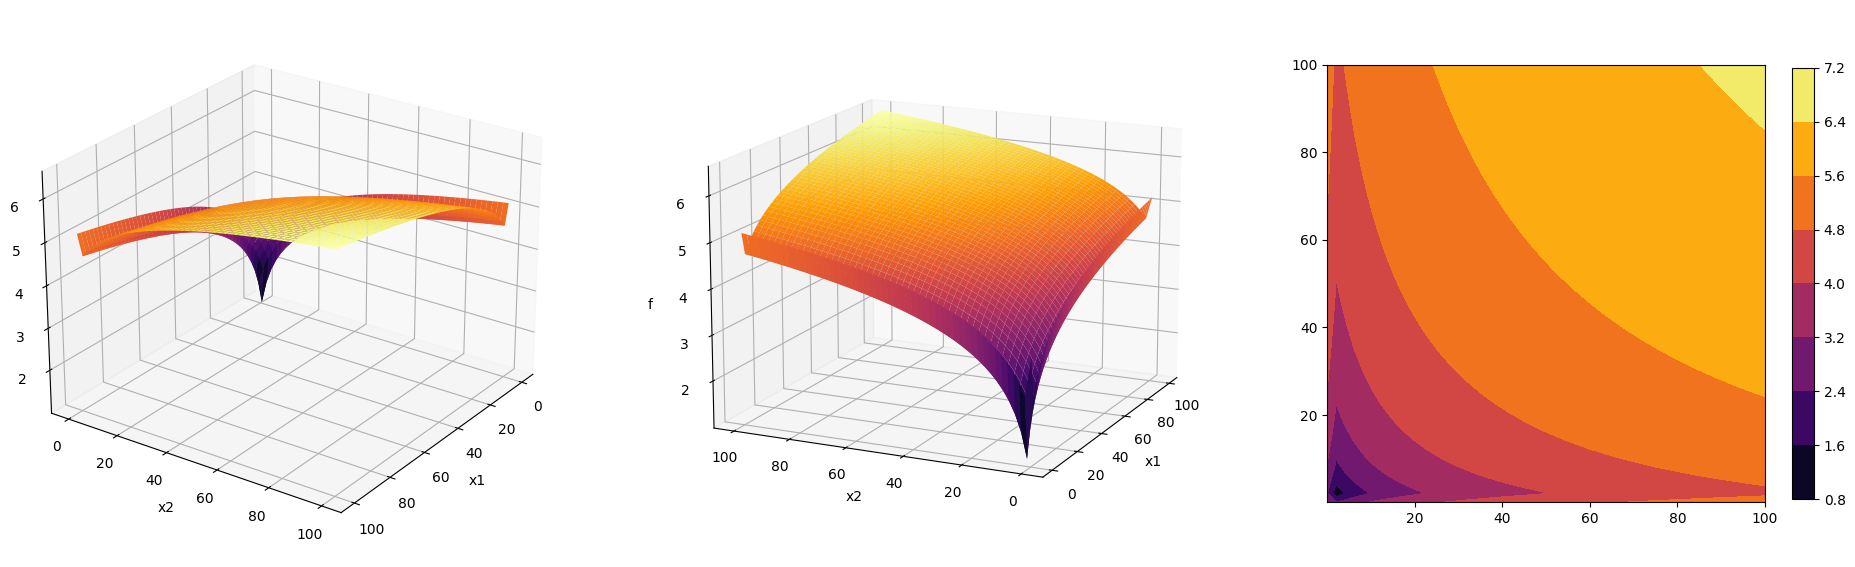

In [4]:
plotFunction(x1=[0.1, 100], x2=[0.1, 100])

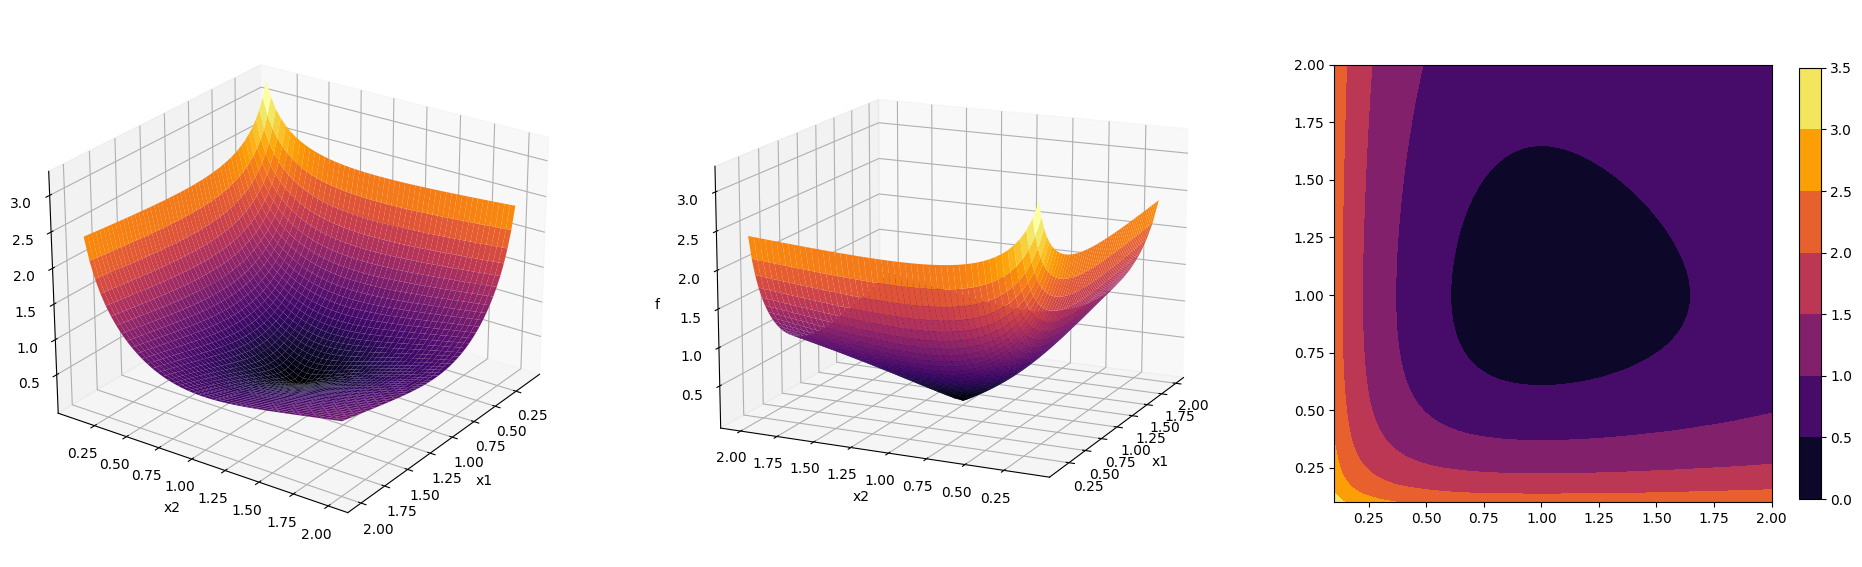

In [5]:
plotFunction(x1=[0.1, 2], x2=[0.1, 2])

## 3 - Implementação dos Métodos


In [6]:

def nextPoint(currentPoint, objectiveFunction, minOrMax, constraintsList, kwargs):
    if (kwargs.iterationLimit = 0): 
        return currentPoint, "Iteration Limit Reached"
    evaluation = #todo
    if (kwargs.backEvaluation - evaluation <= kwargs.epsolon*minOrMax && kwargs.stepSize <= kwargs.epsolon): 
        return currentPoint, ""
    direction = #todo
    stepSize = #todo
    newPoint = #todo
    return nextPoint(newPoint, objectiveFunction, minOrMax, constraintsList, kwargs"""modfyied""")

SyntaxError: invalid syntax (1791396322.py, line 2)